In \[1\]:

    import warnings
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    warnings.filterwarnings("ignore")
    plt.style.use('fivethirtyeight')
    import pandas as pd
    import statsmodels.api as sm
    import matplotlib
    matplotlib.rcParams['axes.labelsize'] = 14
    matplotlib.rcParams['xtick.labelsize'] = 12
    matplotlib.rcParams['ytick.labelsize'] = 12
    matplotlib.rcParams['text.color'] = 'k'

In \[9\]:

    df = pd.read_excel("Sample - Superstore.xls")

In \[27\]:

    df.head()

Out\[27\]:

|     | Row ID | Order ID       | Order Date | Ship Date  | Ship Mode      | Customer ID | Customer Name   | Segment   | Country       | City            | ... | Postal Code | Region | Product ID      | Category        | Sub-Category | Product Name                                      | Sales    | Quantity | Discount | Profit    |
|-----|--------|----------------|------------|------------|----------------|-------------|-----------------|-----------|---------------|-----------------|-----|-------------|--------|-----------------|-----------------|--------------|---------------------------------------------------|----------|----------|----------|-----------|
| 0   | 1      | CA-2016-152156 | 2016-11-08 | 2016-11-11 | Second Class   | CG-12520    | Claire Gute     | Consumer  | United States | Henderson       | ... | 42420       | South  | FUR-BO-10001798 | Furniture       | Bookcases    | Bush Somerset Collection Bookcase                 | 261.9600 | 2        | 0.00     | 41.9136   |
| 1   | 2      | CA-2016-152156 | 2016-11-08 | 2016-11-11 | Second Class   | CG-12520    | Claire Gute     | Consumer  | United States | Henderson       | ... | 42420       | South  | FUR-CH-10000454 | Furniture       | Chairs       | Hon Deluxe Fabric Upholstered Stacking Chairs,... | 731.9400 | 3        | 0.00     | 219.5820  |
| 2   | 3      | CA-2016-138688 | 2016-06-12 | 2016-06-16 | Second Class   | DV-13045    | Darrin Van Huff | Corporate | United States | Los Angeles     | ... | 90036       | West   | OFF-LA-10000240 | Office Supplies | Labels       | Self-Adhesive Address Labels for Typewriters b... | 14.6200  | 2        | 0.00     | 6.8714    |
| 3   | 4      | US-2015-108966 | 2015-10-11 | 2015-10-18 | Standard Class | SO-20335    | Sean O'Donnell  | Consumer  | United States | Fort Lauderdale | ... | 33311       | South  | FUR-TA-10000577 | Furniture       | Tables       | Bretford CR4500 Series Slim Rectangular Table     | 957.5775 | 5        | 0.45     | -383.0310 |
| 4   | 5      | US-2015-108966 | 2015-10-11 | 2015-10-18 | Standard Class | SO-20335    | Sean O'Donnell  | Consumer  | United States | Fort Lauderdale | ... | 33311       | South  | OFF-ST-10000760 | Office Supplies | Storage      | Eldon Fold 'N Roll Cart System                    | 22.3680  | 2        | 0.20     | 2.5164    |

5 rows × 21 columns

In \[45\]:

    df.tail()

Out\[45\]:

|      | Row ID | Order ID       | Order Date | Ship Date  | Ship Mode      | Customer ID | Customer Name    | Segment  | Country       | City        | ... | Postal Code | Region | Product ID      | Category        | Sub-Category | Product Name                                      | Sales   | Quantity | Discount | Profit  |
|------|--------|----------------|------------|------------|----------------|-------------|------------------|----------|---------------|-------------|-----|-------------|--------|-----------------|-----------------|--------------|---------------------------------------------------|---------|----------|----------|---------|
| 9989 | 9990   | CA-2014-110422 | 2014-01-21 | 2014-01-23 | Second Class   | TB-21400    | Tom Boeckenhauer | Consumer | United States | Miami       | ... | 33180       | South  | FUR-FU-10001889 | Furniture       | Furnishings  | Ultra Door Pull Handle                            | 25.248  | 3        | 0.2      | 4.1028  |
| 9990 | 9991   | CA-2017-121258 | 2017-02-26 | 2017-03-03 | Standard Class | DB-13060    | Dave Brooks      | Consumer | United States | Costa Mesa  | ... | 92627       | West   | FUR-FU-10000747 | Furniture       | Furnishings  | Tenex B1-RE Series Chair Mats for Low Pile Car... | 91.960  | 2        | 0.0      | 15.6332 |
| 9991 | 9992   | CA-2017-121258 | 2017-02-26 | 2017-03-03 | Standard Class | DB-13060    | Dave Brooks      | Consumer | United States | Costa Mesa  | ... | 92627       | West   | TEC-PH-10003645 | Technology      | Phones       | Aastra 57i VoIP phone                             | 258.576 | 2        | 0.2      | 19.3932 |
| 9992 | 9993   | CA-2017-121258 | 2017-02-26 | 2017-03-03 | Standard Class | DB-13060    | Dave Brooks      | Consumer | United States | Costa Mesa  | ... | 92627       | West   | OFF-PA-10004041 | Office Supplies | Paper        | It's Hot Message Books with Stickers, 2 3/4" x 5" | 29.600  | 4        | 0.0      | 13.3200 |
| 9993 | 9994   | CA-2017-119914 | 2017-05-04 | 2017-05-09 | Second Class   | CC-12220    | Chris Cortes     | Consumer | United States | Westminster | ... | 92683       | West   | OFF-AP-10002684 | Office Supplies | Appliances   | Acco 7-Outlet Masterpiece Power Center, Wihtou... | 243.160 | 2        | 0.0      | 72.9480 |

5 rows × 21 columns

In \[46\]:

    df.info

Out\[46\]:

    <bound method DataFrame.info of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
    0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
    1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
    2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
    3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
    4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
    ...      ...             ...        ...        ...             ...   
    9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
    9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
    9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
    9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
    9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

         Customer ID     Customer Name    Segment        Country             City  \
    0       CG-12520       Claire Gute   Consumer  United States        Henderson   
    1       CG-12520       Claire Gute   Consumer  United States        Henderson   
    2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
    3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
    4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
    ...          ...               ...        ...            ...              ...   
    9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
    9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
    9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
    9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
    9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

          ... Postal Code  Region       Product ID         Category Sub-Category  \
    0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
    1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
    2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
    3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
    4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
    ...   ...         ...     ...              ...              ...          ...   
    9989  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
    9990  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
    9991  ...       92627    West  TEC-PH-10003645       Technology       Phones   
    9992  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
    9993  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                               Product Name     Sales  Quantity  \
    0                     Bush Somerset Collection Bookcase  261.9600         2   
    1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
    2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
    3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
    4                        Eldon Fold 'N Roll Cart System   22.3680         2   
    ...                                                 ...       ...       ...   
    9989                             Ultra Door Pull Handle   25.2480         3   
    9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
    9991                              Aastra 57i VoIP phone  258.5760         2   
    9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
    9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

          Discount    Profit  
    0         0.00   41.9136  
    1         0.00  219.5820  
    2         0.00    6.8714  
    3         0.45 -383.0310  
    4         0.20    2.5164  
    ...        ...       ...  
    9989      0.20    4.1028  
    9990      0.00   15.6332  
    9991      0.20   19.3932  
    9992      0.00   13.3200  
    9993      0.00   72.9480  

    [9994 rows x 21 columns]>

In \[47\]:

    df.describe

Out\[47\]:

    <bound method NDFrame.describe of       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
    0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
    1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
    2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
    3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
    4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
    ...      ...             ...        ...        ...             ...   
    9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
    9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
    9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
    9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
    9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

         Customer ID     Customer Name    Segment        Country             City  \
    0       CG-12520       Claire Gute   Consumer  United States        Henderson   
    1       CG-12520       Claire Gute   Consumer  United States        Henderson   
    2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
    3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
    4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
    ...          ...               ...        ...            ...              ...   
    9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
    9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
    9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
    9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
    9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

          ... Postal Code  Region       Product ID         Category Sub-Category  \
    0     ...       42420   South  FUR-BO-10001798        Furniture    Bookcases   
    1     ...       42420   South  FUR-CH-10000454        Furniture       Chairs   
    2     ...       90036    West  OFF-LA-10000240  Office Supplies       Labels   
    3     ...       33311   South  FUR-TA-10000577        Furniture       Tables   
    4     ...       33311   South  OFF-ST-10000760  Office Supplies      Storage   
    ...   ...         ...     ...              ...              ...          ...   
    9989  ...       33180   South  FUR-FU-10001889        Furniture  Furnishings   
    9990  ...       92627    West  FUR-FU-10000747        Furniture  Furnishings   
    9991  ...       92627    West  TEC-PH-10003645       Technology       Phones   
    9992  ...       92627    West  OFF-PA-10004041  Office Supplies        Paper   
    9993  ...       92683    West  OFF-AP-10002684  Office Supplies   Appliances   

                                               Product Name     Sales  Quantity  \
    0                     Bush Somerset Collection Bookcase  261.9600         2   
    1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
    2     Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
    3         Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
    4                        Eldon Fold 'N Roll Cart System   22.3680         2   
    ...                                                 ...       ...       ...   
    9989                             Ultra Door Pull Handle   25.2480         3   
    9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600         2   
    9991                              Aastra 57i VoIP phone  258.5760         2   
    9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000         4   
    9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600         2   

          Discount    Profit  
    0         0.00   41.9136  
    1         0.00  219.5820  
    2         0.00    6.8714  
    3         0.45 -383.0310  
    4         0.20    2.5164  
    ...        ...       ...  
    9989      0.20    4.1028  
    9990      0.00   15.6332  
    9991      0.20   19.3932  
    9992      0.00   13.3200  
    9993      0.00   72.9480  

    [9994 rows x 21 columns]>

In \[48\]:

    df.columns

Out\[48\]:

    Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
           'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
           'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
           'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
          dtype='object')

In \[49\]:

    df.shape

Out\[49\]:

    (9994, 21)

In \[50\]:

    df.size

Out\[50\]:

    209874

In \[8\]:

    pip install xlrd

    Collecting xlrd
      Obtaining dependency information for xlrd from https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl.metadata
      Downloading xlrd-2.0.1-py2.py3-none-any.whl.metadata (3.4 kB)
    Downloading xlrd-2.0.1-py2.py3-none-any.whl (96 kB)
       ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
       ------------ --------------------------- 30.7/96.5 kB 660.6 kB/s eta 0:00:01
       ------------------------- -------------- 61.4/96.5 kB 812.7 kB/s eta 0:00:01
       ------------------------- -------------- 61.4/96.5 kB 812.7 kB/s eta 0:00:01
       ---------------------------------------- 96.5/96.5 kB 501.7 kB/s eta 0:00:00
    Installing collected packages: xlrd
    Successfully installed xlrd-2.0.1
    Note: you may need to restart the kernel to use updated packages.

In \[10\]:

    furniture = df.loc[df['Category'] == 'Furniture']

In \[51\]:

    furniture

Out\[51\]:

|     | Order Date | Sales       |
|-----|------------|-------------|
| 0   | 2014-01-01 | 480.194231  |
| 1   | 2014-02-01 | 367.931600  |
| 2   | 2014-03-01 | 857.291529  |
| 3   | 2014-04-01 | 567.488357  |
| 4   | 2014-05-01 | 432.049188  |
| 5   | 2014-06-01 | 695.059242  |
| 6   | 2014-07-01 | 601.169500  |
| 7   | 2014-08-01 | 457.521656  |
| 8   | 2014-09-01 | 992.353367  |
| 9   | 2014-10-01 | 769.015437  |
| 10  | 2014-11-01 | 980.221486  |
| 11  | 2014-12-01 | 1532.298325 |
| 12  | 2015-01-01 | 978.328467  |
| 13  | 2015-02-01 | 522.395667  |
| 14  | 2015-03-01 | 781.236437  |
| 15  | 2015-04-01 | 805.822962  |
| 16  | 2015-05-01 | 624.996700  |
| 17  | 2015-06-01 | 428.565500  |
| 18  | 2015-07-01 | 719.706316  |
| 19  | 2015-08-01 | 602.412012  |
| 20  | 2015-09-01 | 1382.790684 |
| 21  | 2015-10-01 | 632.980184  |
| 22  | 2015-11-01 | 1286.701354 |
| 23  | 2015-12-01 | 1049.355418 |
| 24  | 2016-01-01 | 508.182867  |
| 25  | 2016-02-01 | 356.868273  |
| 26  | 2016-03-01 | 609.575810  |
| 27  | 2016-04-01 | 695.373158  |
| 28  | 2016-05-01 | 687.265227  |
| 29  | 2016-06-01 | 816.910750  |
| 30  | 2016-07-01 | 768.736412  |
| 31  | 2016-08-01 | 734.307782  |
| 32  | 2016-09-01 | 1135.953371 |
| 33  | 2016-10-01 | 624.872474  |
| 34  | 2016-11-01 | 1271.345152 |
| 35  | 2016-12-01 | 1410.719808 |
| 36  | 2017-01-01 | 397.602133  |
| 37  | 2017-02-01 | 528.179800  |
| 38  | 2017-03-01 | 544.672240  |
| 39  | 2017-04-01 | 453.297905  |
| 40  | 2017-05-01 | 678.302328  |
| 41  | 2017-06-01 | 826.460291  |
| 42  | 2017-07-01 | 562.524857  |
| 43  | 2017-08-01 | 857.881889  |
| 44  | 2017-09-01 | 1209.508583 |
| 45  | 2017-10-01 | 875.362728  |
| 46  | 2017-11-01 | 1277.817759 |
| 47  | 2017-12-01 | 1256.298672 |

In \[11\]:

    furniture['Order Date'].min(), furniture['Order Date'].max()

Out\[11\]:

    (Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In \[12\]:

    # Data Preprocessing
    # This step includes removing columns we do not need, check missing values, aggregate sales by date and so on.

    cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
    furniture.drop(cols, axis=1, inplace=True)
    furniture = furniture.sort_values('Order Date')
    furniture.isnull().sum()

Out\[12\]:

    Order Date    0
    Sales         0
    dtype: int64

In \[13\]:

    furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In \[52\]:

    furniture

Out\[52\]:

|     | Order Date | Sales       |
|-----|------------|-------------|
| 0   | 2014-01-01 | 480.194231  |
| 1   | 2014-02-01 | 367.931600  |
| 2   | 2014-03-01 | 857.291529  |
| 3   | 2014-04-01 | 567.488357  |
| 4   | 2014-05-01 | 432.049188  |
| 5   | 2014-06-01 | 695.059242  |
| 6   | 2014-07-01 | 601.169500  |
| 7   | 2014-08-01 | 457.521656  |
| 8   | 2014-09-01 | 992.353367  |
| 9   | 2014-10-01 | 769.015437  |
| 10  | 2014-11-01 | 980.221486  |
| 11  | 2014-12-01 | 1532.298325 |
| 12  | 2015-01-01 | 978.328467  |
| 13  | 2015-02-01 | 522.395667  |
| 14  | 2015-03-01 | 781.236437  |
| 15  | 2015-04-01 | 805.822962  |
| 16  | 2015-05-01 | 624.996700  |
| 17  | 2015-06-01 | 428.565500  |
| 18  | 2015-07-01 | 719.706316  |
| 19  | 2015-08-01 | 602.412012  |
| 20  | 2015-09-01 | 1382.790684 |
| 21  | 2015-10-01 | 632.980184  |
| 22  | 2015-11-01 | 1286.701354 |
| 23  | 2015-12-01 | 1049.355418 |
| 24  | 2016-01-01 | 508.182867  |
| 25  | 2016-02-01 | 356.868273  |
| 26  | 2016-03-01 | 609.575810  |
| 27  | 2016-04-01 | 695.373158  |
| 28  | 2016-05-01 | 687.265227  |
| 29  | 2016-06-01 | 816.910750  |
| 30  | 2016-07-01 | 768.736412  |
| 31  | 2016-08-01 | 734.307782  |
| 32  | 2016-09-01 | 1135.953371 |
| 33  | 2016-10-01 | 624.872474  |
| 34  | 2016-11-01 | 1271.345152 |
| 35  | 2016-12-01 | 1410.719808 |
| 36  | 2017-01-01 | 397.602133  |
| 37  | 2017-02-01 | 528.179800  |
| 38  | 2017-03-01 | 544.672240  |
| 39  | 2017-04-01 | 453.297905  |
| 40  | 2017-05-01 | 678.302328  |
| 41  | 2017-06-01 | 826.460291  |
| 42  | 2017-07-01 | 562.524857  |
| 43  | 2017-08-01 | 857.881889  |
| 44  | 2017-09-01 | 1209.508583 |
| 45  | 2017-10-01 | 875.362728  |
| 46  | 2017-11-01 | 1277.817759 |
| 47  | 2017-12-01 | 1256.298672 |

In \[14\]:

    # Indexing with Time Series Data

    furniture = furniture.set_index('Order Date')
    furniture.index

Out\[14\]:

    DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
                   '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
                   '2014-01-20', '2014-01-21',
                   ...
                   '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
                   '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
                   '2017-12-29', '2017-12-30'],
                  dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In \[15\]:

    y = furniture['Sales'].resample('MS').mean()

In \[53\]:

    y

Out\[53\]:

    Order Date
    2014-01-01     480.194231
    2014-02-01     367.931600
    2014-03-01     857.291529
    2014-04-01     567.488357
    2014-05-01     432.049188
    2014-06-01     695.059242
    2014-07-01     601.169500
    2014-08-01     457.521656
    2014-09-01     992.353367
    2014-10-01     769.015437
    2014-11-01     980.221486
    2014-12-01    1532.298325
    2015-01-01     978.328467
    2015-02-01     522.395667
    2015-03-01     781.236437
    2015-04-01     805.822962
    2015-05-01     624.996700
    2015-06-01     428.565500
    2015-07-01     719.706316
    2015-08-01     602.412012
    2015-09-01    1382.790684
    2015-10-01     632.980184
    2015-11-01    1286.701354
    2015-12-01    1049.355418
    2016-01-01     508.182867
    2016-02-01     356.868273
    2016-03-01     609.575810
    2016-04-01     695.373158
    2016-05-01     687.265227
    2016-06-01     816.910750
    2016-07-01     768.736412
    2016-08-01     734.307782
    2016-09-01    1135.953371
    2016-10-01     624.872474
    2016-11-01    1271.345152
    2016-12-01    1410.719808
    2017-01-01     397.602133
    2017-02-01     528.179800
    2017-03-01     544.672240
    2017-04-01     453.297905
    2017-05-01     678.302328
    2017-06-01     826.460291
    2017-07-01     562.524857
    2017-08-01     857.881889
    2017-09-01    1209.508583
    2017-10-01     875.362728
    2017-11-01    1277.817759
    2017-12-01    1256.298672
    Freq: MS, Name: Sales, dtype: float64

In \[16\]:

    # Have a quick peek 2017 furniture sales data.

    y['2017':]

Out\[16\]:

    Order Date
    2017-01-01     397.602133
    2017-02-01     528.179800
    2017-03-01     544.672240
    2017-04-01     453.297905
    2017-05-01     678.302328
    2017-06-01     826.460291
    2017-07-01     562.524857
    2017-08-01     857.881889
    2017-09-01    1209.508583
    2017-10-01     875.362728
    2017-11-01    1277.817759
    2017-12-01    1256.298672
    Freq: MS, Name: Sales, dtype: float64

In \[17\]:

    # Visualizing Furniture Sales Time Series Data

    y.plot(figsize=(15, 6))
    plt.show()

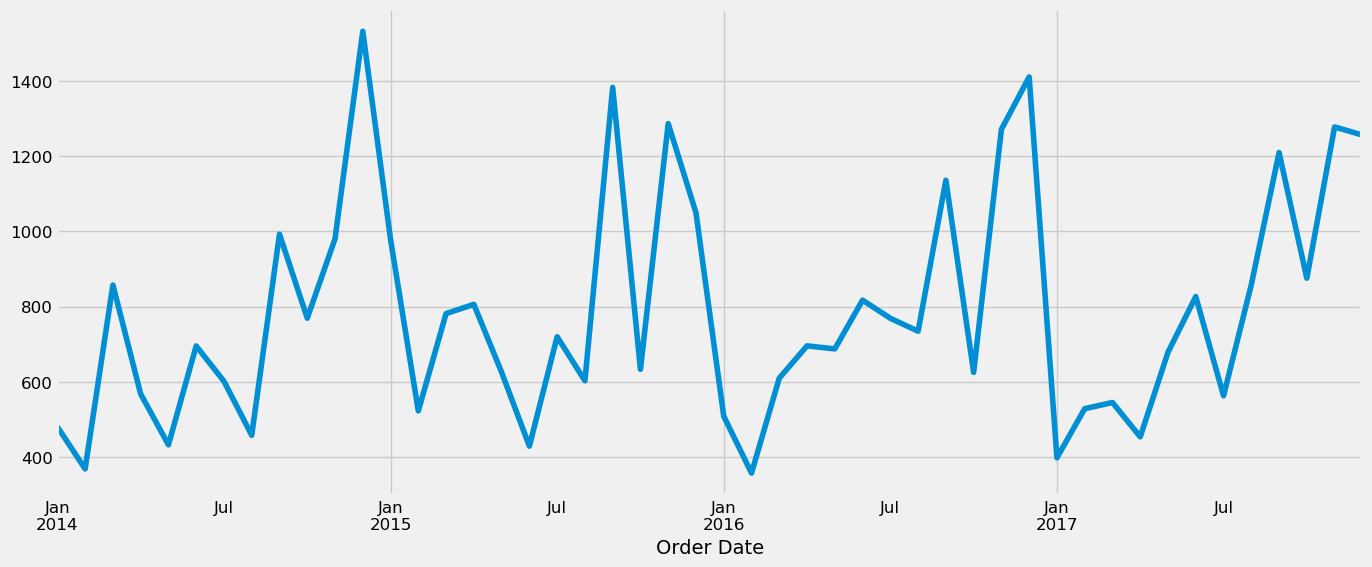

In \[18\]:

    from pylab import rcParams
    rcParams['figure.figsize'] = 18, 8
    decomposition = sm.tsa.seasonal_decompose(y, model='additive')
    fig = decomposition.plot()
    plt.show()

    # The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.

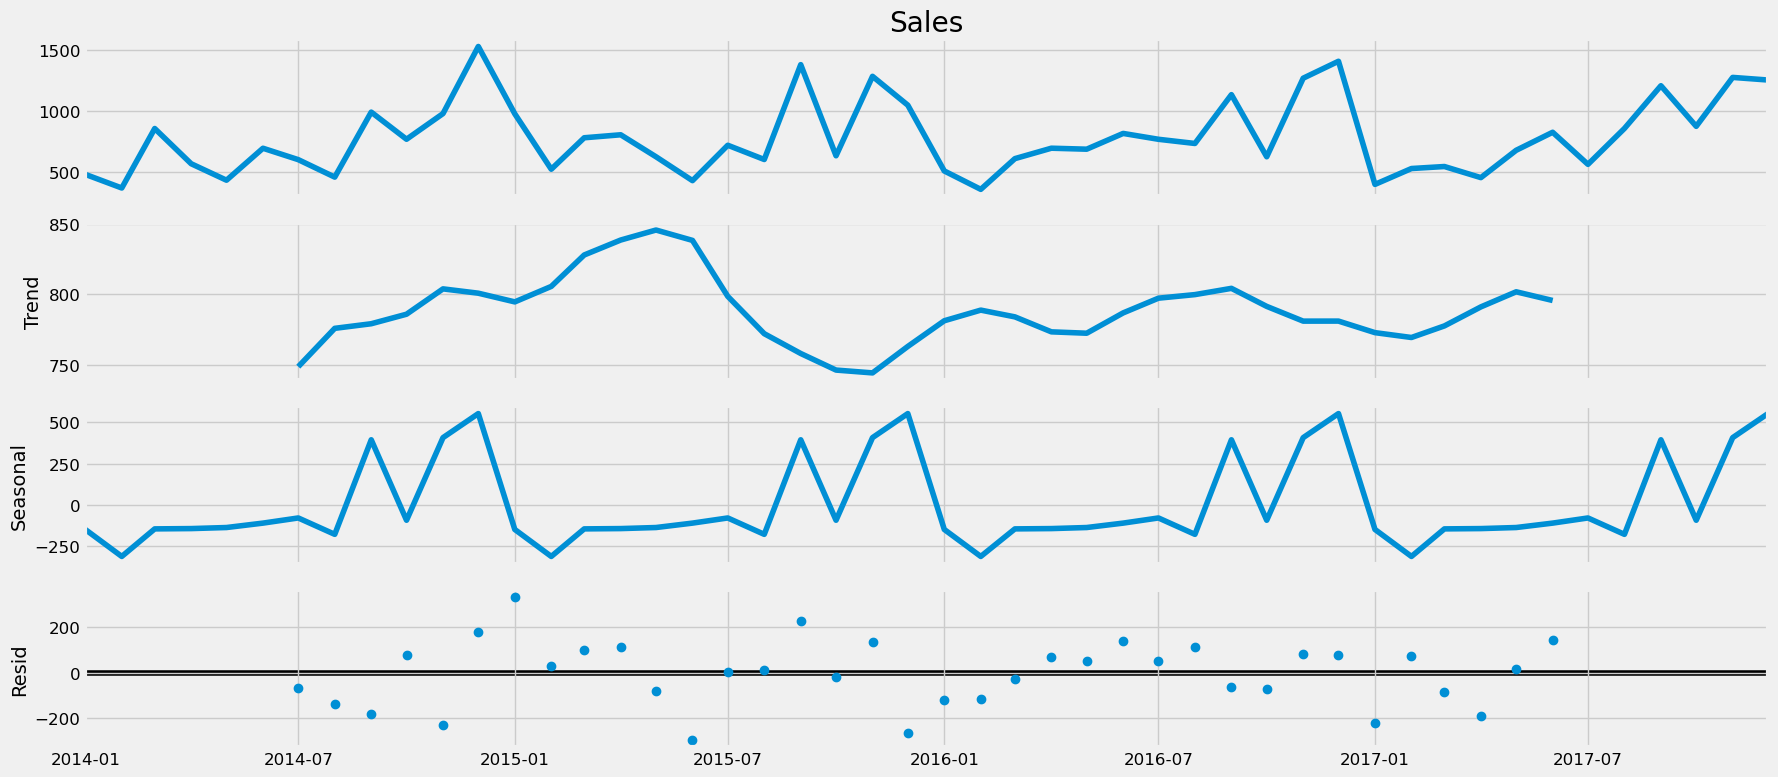

In \[19\]:

    # Time series forecasting with ARIMA
    # We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

    # ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:

    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    print('Examples of parameter combinations for Seasonal ARIMA...')
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
    print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
    print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

    Examples of parameter combinations for Seasonal ARIMA...
    SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
    SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
    SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
    SARIMAX: (0, 1, 0) x (1, 0, 0, 12)

In \[20\]:

    # This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In \[23\]:

    import statsmodels.api as sm
    import itertools

    # Define your pdq and seasonal_pdq here

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)
                results = mod.fit()
                print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue

    ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
    ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1359.2613166543165

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130918252
    ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793677
    ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1162.400200303408
    ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
    ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280302517
    ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758108

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2686.290255485825
    ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809151
    ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732967

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5754723153666

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2378.4977360755684
    ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468674
    ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.8725576524673
    ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668414504

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1449.7633893837328
    ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672393664
    ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:304.9671228167958
    ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408
    ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1426.4392868874488
    ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109212
    ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:306.9113200151378
    ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817015

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2558.0636768431705
    ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484829773
    ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.580623332696
    ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774426417

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1642.362703291146
    ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684173614
    ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.5576621461239
    ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067713
    ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1481.052467914739
    ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.4632147852136
    ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:304.20776751609543
    ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679352126

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1169.8037992516468
    ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750845696
    ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:304.58426921438667
    ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186178

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2524.9803095771363
    ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958141744
    ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:293.34221939658994
    ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238771035

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2277.036785953071
    ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021285906
    ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:293.7513188124458
    ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541903

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1385.4368990523217
    ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
    ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.2130611619096
    ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784543
    ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1428.4381346317903
    ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.627090134543
    ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3264992507578
    ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835391

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2526.0123544838425
    ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610734
    ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:281.3873006939412
    ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546607585

    C:\Users\Amrendra Mishra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
      warnings.warn("Maximum Likelihood optimization failed to "

    ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2575.319380420569
    ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395426614
    ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:283.3661017119429

In \[24\]:

    # Fitting the ARIMA model

    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=(1, 1, 1),
                                    seasonal_order=(1, 1, 0, 12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)
    results = mod.fit()
    print(results.summary().tables[1])

    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
    ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
    ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
    sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04
    ==============================================================================

In \[35\]:

    # Validating forecasts

    pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
    pred_ci = pred.conf_int()
    ax = y['2014':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)
    ax.set_xlabel('Date')
    ax.set_ylabel('Furniture Sales')
    plt.legend()
    plt.show()

    # The line plot is showing the observed values compared to the rolling forecast predictions. Overall, 
    # our forecasts align with the true values very well, 
    # showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

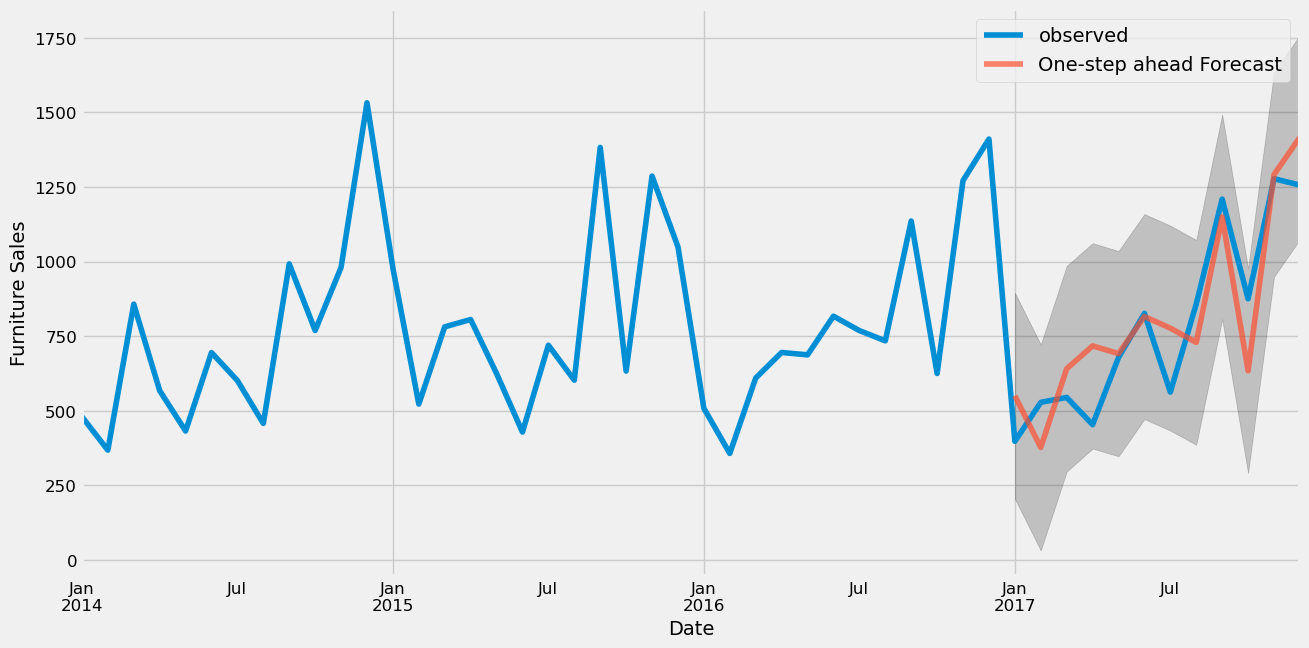

In \[36\]:

    y_forecasted = pred.predicted_mean
    y_truth = y['2017-01-01':]
    mse = ((y_forecasted - y_truth) ** 2).mean()
    print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

    The Mean Squared Error of our forecasts is 22993.57

In \[37\]:

    print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

    The Root Mean Squared Error of our forecasts is 151.64

In \[38\]:

    pred_uc = results.get_forecast(steps=100)
    pred_ci = pred_uc.conf_int()
    ax = y.plot(label='observed', figsize=(14, 7))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Furniture Sales')
    plt.legend()
    plt.show()

    # Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

    # The above time series analysis for furniture makes me curious about other categories,
    # and how do they compare with each other over time.
    # Therefore, we are going to compare time series of furniture and office supplier.

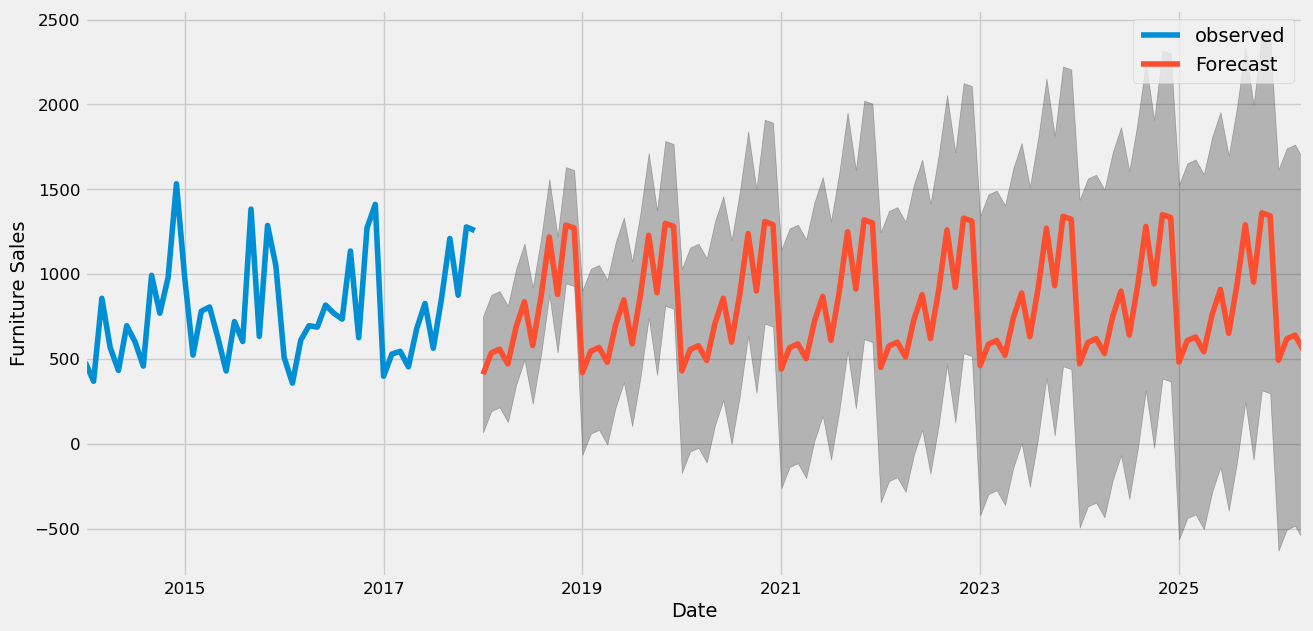

In \[39\]:

    # Time Series of Furniture vs. Office Supplies
    # According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

    furniture = df.loc[df['Category'] == 'Furniture']
    office = df.loc[df['Category'] == 'Office Supplies']
    furniture.shape, office.shape

Out\[39\]:

    ((2121, 21), (6026, 21))

In \[40\]:

    # Data Exploration

    cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
    furniture.drop(cols, axis=1, inplace=True)
    office.drop(cols, axis=1, inplace=True)
    furniture = furniture.sort_values('Order Date')
    office = office.sort_values('Order Date')
    furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
    office = office.groupby('Order Date')['Sales'].sum().reset_index()
    furniture = furniture.set_index('Order Date')
    office = office.set_index('Order Date')
    y_furniture = furniture['Sales'].resample('MS').mean()
    y_office = office['Sales'].resample('MS').mean()
    furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
    office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
    store = furniture.merge(office, how='inner', on='Order Date')
    store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
    store.head()

Out\[40\]:

|     | Order Date | furniture_sales | office_sales |
|-----|------------|-----------------|--------------|
| 0   | 2014-01-01 | 480.194231      | 285.357647   |
| 1   | 2014-02-01 | 367.931600      | 63.042588    |
| 2   | 2014-03-01 | 857.291529      | 391.176318   |
| 3   | 2014-04-01 | 567.488357      | 464.794750   |
| 4   | 2014-05-01 | 432.049188      | 324.346545   |

In \[41\]:

    plt.figure(figsize=(20, 8))
    plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
    plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
    plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
    plt.legend();

    # We observe that sales of furniture and office supplies shared a similar seasonal pattern. 
    # Early of the year is the off season for both of the two categories. 
    # It seems summer time is quiet for office supplies too. 
    # in addition, average daily sales for furniture are higher than those of office supplies in most of the months. 
    # It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, 
    # office supplies passed furniture on average daily sales. 
    # Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.

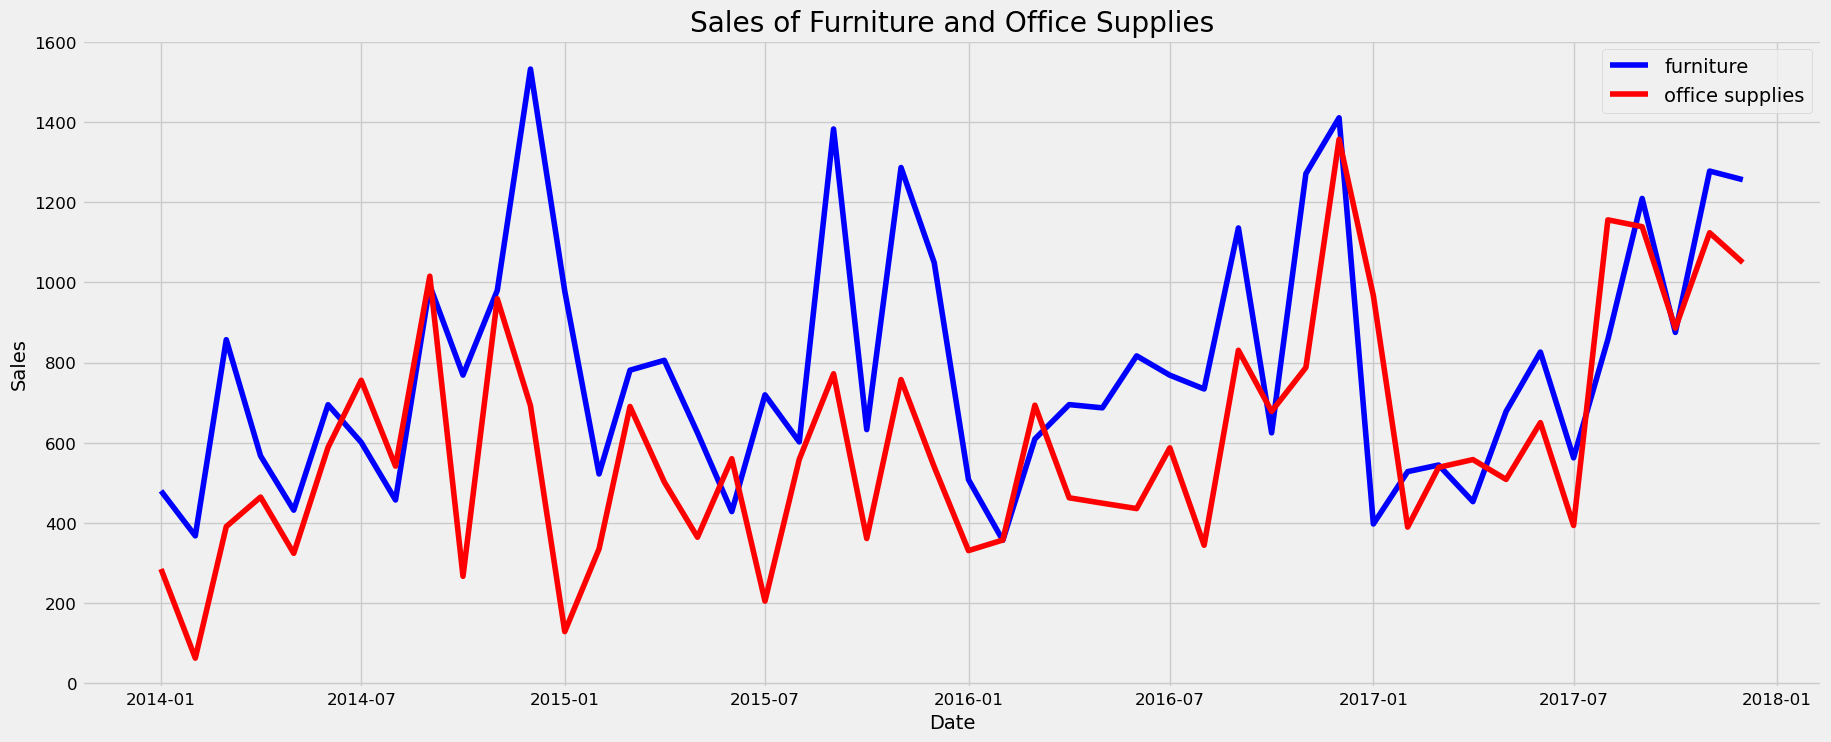

In \[ \]:

     

In \[ \]:

     

In \[ \]: